In [2]:
import tensorflow as tf
tf.__version__
tf.config.experimental.enable_op_determinism()
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [4]:
def plot_columns(df):
    colors = plt.cm.tab20(range(df.shape[1]))  

    for i, column in enumerate(df.columns):
        color = colors[i % 24]

        plt.figure()
        plt.plot(df.index, df[column], color=color)
        plt.xlabel('Tempo')
        plt.ylabel('Valor')
        plt.title(column)

    plt.show()

In [5]:
def plot_correlation_matrix(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()

In [6]:
tf.keras.backend.clear_session()

In [7]:
subject = 'Mato_Grosso - Consumo de Cimento (t)'
start_index = 0
split_index = 179
window_size = 36
train_split = split_index + 1 - 12

In [8]:
data = pd.read_csv('2003_raw_Mato_Grosso_input.csv')
pd.set_option('display.max_columns', None)
data = data.replace(-1.0, np.nan)
data

,data,Mato_Grosso - PIB - Per Capita,Mato_Grosso - PIB - Preços de Mercado,Mato_Grosso - PIB - Estadual,Mato_Grosso - PIB - Construção Civil,Mato_Grosso - População,Mato_Grosso - INCC (%),Mato_Grosso - IPCA - Variação mensal durante o Plano Real (%),Mato_Grosso - IGP-DI,Mato_Grosso - Taxa Selic (%),Mato_Grosso - IDH - Longevidade,Mato_Grosso - IDH - Renda,Mato_Grosso - IDH - Educação,Mato_Grosso - NFSP - Fluxo Mensal (Milhões de reais),Mato_Grosso - Estoque liquido de capital fixo - (R$),Mato_Grosso - Desemprego,Mato_Grosso - Produção de Cimento (t),Mato_Grosso - Valor,Mato_Grosso - Consumo de Cimento (t)
0,2003-01-01,2.646116e+06,1.392879e+06,1.015884,2.281315e+06,2604742.0,1.70,12.53,2.70,0.082293,0.74,0.689,0.426,3.46,6.098524e+06,7.354225,NaN,0.3600,47470.0
1,2003-02-01,2.646116e+06,1.392879e+06,1.015884,2.281315e+06,2604742.0,1.51,2.25,2.17,0.088771,0.74,0.689,0.426,3.59,6.172460e+06,7.354225,33149.0,0.3800,45387.0
2,2003-03-01,2.646116e+06,1.392879e+06,1.015884,2.281315e+06,2604742.0,1.39,3.86,1.59,0.090733,0.74,0.689,0.426,3.84,6.172460e+06,7.354225,47683.0,0.3800,44907.0
3,2003-04-01,2.646116e+06,1.392879e+06,1.015884,2.281315e+06,2604742.0,1.38,5.13,1.66,0.092749,0.74,0.689,0.426,3.95,6.172460e+06,7.354225,122799.0,0.3800,45467.0
4,2003-05-01,2.646116e+06,1.392879e+06,1.015884,2.281315e+06,2604742.0,0.90,6.15,0.41,0.092758,0.74,0.689,0.426,4.06,6.172460e+06,7.354225,103947.0,0.3800,56246.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,2019-08-01,6.059536e+06,1.022451e+07,1.760471,3.120968e+06,3441998.0,0.58,2.42,-0.01,0.024620,0.83,0.740,0.760,0.69,7.827728e+06,12.300000,273496.0,0.5030,144310.0
200,2019-09-01,6.059536e+06,1.022451e+07,1.760471,3.120968e+06,3441998.0,0.42,2.54,-0.51,0.022751,0.83,0.740,0.760,0.62,7.827728e+06,12.000000,25764.0,0.5036,140357.0
201,2019-10-01,6.059536e+06,1.022451e+07,1.760471,3.120968e+06,3441998.0,0.46,2.49,0.50,0.022035,0.83,0.740,0.760,0.59,7.827728e+06,11.900000,72401.0,0.5030,152769.0
202,2019-11-01,6.059536e+06,1.022451e+07,1.760471,3.120968e+06,3441998.0,0.18,2.60,0.55,0.020790,0.83,0.740,0.760,0.57,7.827728e+06,11.700000,11705.0,0.5032,124038.0


In [9]:
# Shift para prever futuro e não presente
target_data = data[subject].shift(-24)
target_data = target_data/1000
target_data

0      55.998
1      49.346
2      57.277
3      61.881
4      65.040
        ...  
199       NaN
200       NaN
201       NaN
202       NaN
203       NaN
Name: Mato_Grosso - Consumo de Cimento (t), Length: 204, dtype: float64

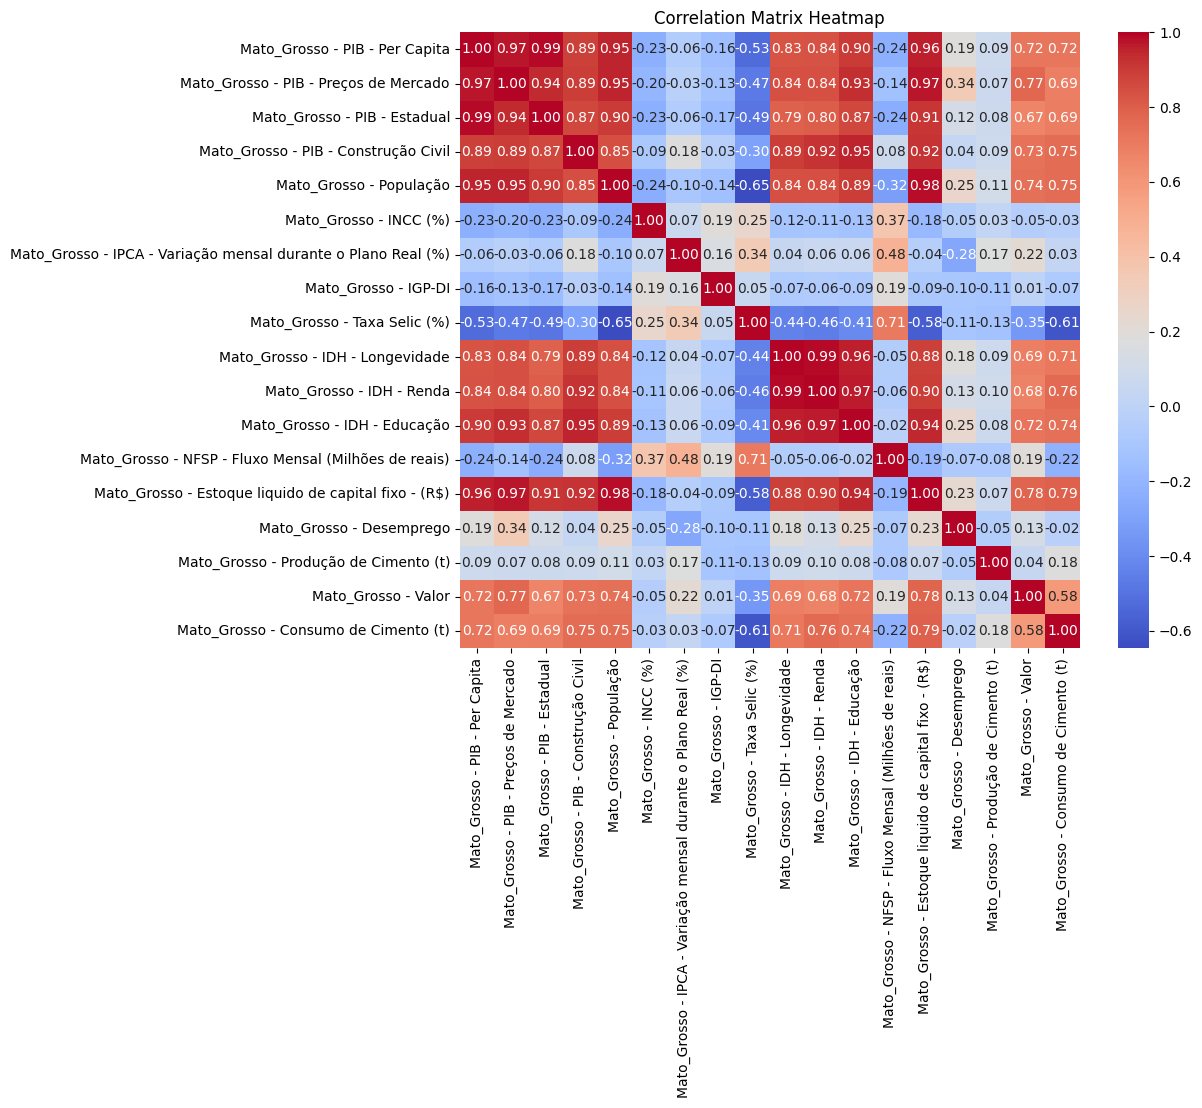

In [10]:
plot_data = data.iloc[:split_index + 1,1:]
plot_correlation_matrix(plot_data)

In [11]:
input_data = data.iloc[:split_index + 1,1:-1]
# mean = np.mean(input_data, axis=0)
# stddev =  np.std(input_data, axis=0)
# input_data = ((input_data - mean) /stddev)
scaler=MinMaxScaler()
scaled_data = scaler.fit_transform(input_data)
input_data = pd.DataFrame(scaled_data, columns=input_data.columns)
input_data = input_data.fillna(-1.0)
input_data

,Mato_Grosso - PIB - Per Capita,Mato_Grosso - PIB - Preços de Mercado,Mato_Grosso - PIB - Estadual,Mato_Grosso - PIB - Construção Civil,Mato_Grosso - População,Mato_Grosso - INCC (%),Mato_Grosso - IPCA - Variação mensal durante o Plano Real (%),Mato_Grosso - IGP-DI,Mato_Grosso - Taxa Selic (%),Mato_Grosso - IDH - Longevidade,Mato_Grosso - IDH - Renda,Mato_Grosso - IDH - Educação,Mato_Grosso - NFSP - Fluxo Mensal (Milhões de reais),Mato_Grosso - Estoque liquido de capital fixo - (R$),Mato_Grosso - Desemprego,Mato_Grosso - Produção de Cimento (t),Mato_Grosso - Valor
0,0.0,0.0,0.0,0.247808,0.0,0.611285,1.000000,1.000000,0.840228,0.000000,0.000000,0.0,0.854722,0.00000,0.302051,-1.000000,0.498221
1,0.0,0.0,0.0,0.247808,0.0,0.551724,0.153909,0.865482,0.939126,0.000000,0.000000,0.0,0.886199,0.04293,0.302051,0.015544,0.569395
2,0.0,0.0,0.0,0.247808,0.0,0.514107,0.286420,0.718274,0.969081,0.000000,0.000000,0.0,0.946731,0.04293,0.302051,0.026984,0.569395
3,0.0,0.0,0.0,0.247808,0.0,0.510972,0.390947,0.736041,0.999866,0.000000,0.000000,0.0,0.973366,0.04293,0.302051,0.086112,0.569395
4,0.0,0.0,0.0,0.247808,0.0,0.360502,0.474897,0.418782,1.000000,0.000000,0.000000,0.0,1.000000,0.04293,0.302051,0.071272,0.569395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1.0,1.0,1.0,0.701366,1.0,0.172414,0.086420,0.238579,0.161726,0.987654,0.953488,1.0,0.198547,1.00000,0.956790,0.136850,0.946619
176,1.0,1.0,1.0,0.701366,1.0,0.191223,0.102058,0.375635,0.114340,0.987654,0.953488,1.0,0.186441,1.00000,0.956790,0.011418,0.953737
177,1.0,1.0,1.0,0.701366,1.0,0.097179,0.115226,0.472081,0.069721,0.987654,0.953488,1.0,0.174334,1.00000,0.956790,0.064637,0.957295
178,1.0,1.0,1.0,0.701366,1.0,0.175549,0.150617,0.340102,0.050532,0.987654,0.953488,1.0,0.174334,1.00000,0.971194,0.000000,0.957295


In [12]:
# input para treinamento
train_input = input_data.iloc[start_index:train_split]
train_input

,Mato_Grosso - PIB - Per Capita,Mato_Grosso - PIB - Preços de Mercado,Mato_Grosso - PIB - Estadual,Mato_Grosso - PIB - Construção Civil,Mato_Grosso - População,Mato_Grosso - INCC (%),Mato_Grosso - IPCA - Variação mensal durante o Plano Real (%),Mato_Grosso - IGP-DI,Mato_Grosso - Taxa Selic (%),Mato_Grosso - IDH - Longevidade,Mato_Grosso - IDH - Renda,Mato_Grosso - IDH - Educação,Mato_Grosso - NFSP - Fluxo Mensal (Milhões de reais),Mato_Grosso - Estoque liquido de capital fixo - (R$),Mato_Grosso - Desemprego,Mato_Grosso - Produção de Cimento (t),Mato_Grosso - Valor
0,0.000000,0.000000,0.000000,0.247808,0.000000,0.611285,1.000000,1.000000,0.840228,0.000000,0.0,0.00000,0.854722,0.000000,0.302051,-1.000000,0.498221
1,0.000000,0.000000,0.000000,0.247808,0.000000,0.551724,0.153909,0.865482,0.939126,0.000000,0.0,0.00000,0.886199,0.042930,0.302051,0.015544,0.569395
2,0.000000,0.000000,0.000000,0.247808,0.000000,0.514107,0.286420,0.718274,0.969081,0.000000,0.0,0.00000,0.946731,0.042930,0.302051,0.026984,0.569395
3,0.000000,0.000000,0.000000,0.247808,0.000000,0.510972,0.390947,0.736041,0.999866,0.000000,0.0,0.00000,0.973366,0.042930,0.302051,0.086112,0.569395
4,0.000000,0.000000,0.000000,0.247808,0.000000,0.360502,0.474897,0.418782,1.000000,0.000000,0.0,0.00000,1.000000,0.042930,0.302051,0.071272,0.569395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0.896408,0.849609,0.894316,0.934294,0.942857,0.231975,0.376955,0.215736,0.385830,0.987654,1.0,0.97093,0.418886,0.991571,0.524693,-1.000000,0.996441
164,0.896408,0.849609,0.894316,0.934294,0.942857,0.169279,0.414815,0.423858,0.385830,0.987654,1.0,0.97093,0.406780,0.991571,0.539096,-1.000000,1.000000
165,0.896408,0.849609,0.894316,0.934294,0.942857,0.181818,0.422222,0.322335,0.385830,0.987654,1.0,0.97093,0.409201,0.991571,0.553499,-1.000000,1.000000
166,0.896408,0.849609,0.894316,0.934294,0.942857,0.144201,0.444444,0.347716,0.380510,0.987654,1.0,0.97093,0.384988,0.991571,0.553499,-1.000000,0.992883


In [13]:
# Alvo para treinamento
train_target = target_data.iloc[start_index:train_split]
train_target

0       55.998
1       49.346
2       57.277
3       61.881
4       65.040
        ...   
163    142.145
164    121.124
165    130.503
166    104.115
167     90.690
Name: Mato_Grosso - Consumo de Cimento (t), Length: 168, dtype: float64

In [14]:
def create_batches(t_input, t_target, window_size, start_from):
    
    X_batches = []
    y_batches = []

    train_input_values = t_input.values 

    for i in range(len(t_input) - window_size):
        
        X_window = train_input_values[i:i+window_size, :]
        y_target = t_target[start_from+i+window_size]

        X_batches.append(X_window)
        y_batches.append(y_target)

    return np.array(X_batches), np.array(y_batches)

In [15]:
reshaped_train, reshaped_target = create_batches(train_input, 
                                                 train_target, 
                                                 window_size, 
                                                 start_index)
reshaped_train.shape

(132, 36, 17)

In [16]:
# input para treinamento
test_input = input_data.iloc[train_split - window_size:split_index + 1]
test_input

,Mato_Grosso - PIB - Per Capita,Mato_Grosso - PIB - Preços de Mercado,Mato_Grosso - PIB - Estadual,Mato_Grosso - PIB - Construção Civil,Mato_Grosso - População,Mato_Grosso - INCC (%),Mato_Grosso - IPCA - Variação mensal durante o Plano Real (%),Mato_Grosso - IGP-DI,Mato_Grosso - Taxa Selic (%),Mato_Grosso - IDH - Longevidade,Mato_Grosso - IDH - Renda,Mato_Grosso - IDH - Educação,Mato_Grosso - NFSP - Fluxo Mensal (Milhões de reais),Mato_Grosso - Estoque liquido de capital fixo - (R$),Mato_Grosso - Desemprego,Mato_Grosso - Produção de Cimento (t),Mato_Grosso - Valor
132,0.781839,0.648791,0.800008,0.884064,0.823887,0.109718,0.455144,0.489848,0.155826,0.864198,1.000000,0.883721,0.215496,0.796254,0.294241,0.694503,0.601423
133,0.781839,0.648791,0.800008,0.884064,0.823887,0.354232,0.013992,0.416244,0.170859,0.864198,1.000000,0.883721,0.203390,0.895320,0.366257,0.043332,0.672598
134,0.781839,0.648791,0.800008,0.884064,0.823887,0.181818,0.070782,0.530457,0.184736,0.864198,1.000000,0.883721,0.198547,0.895320,0.409467,-1.000000,0.675445
135,0.781839,0.648791,0.800008,0.884064,0.823887,0.166144,0.148148,0.690355,0.197075,0.864198,1.000000,0.883721,0.220339,0.895320,0.380661,-1.000000,0.644128
136,0.781839,0.648791,0.800008,0.884064,0.823887,0.354232,0.204115,0.428934,0.209373,0.864198,1.000000,0.883721,0.259080,0.895320,0.351854,-1.000000,0.654804
137,0.781839,0.648791,0.800008,0.884064,0.823887,0.721003,0.242798,0.200508,0.210740,0.864198,1.000000,0.883721,0.273608,0.895320,0.323048,0.094808,0.655516
138,0.781839,0.648791,0.800008,0.884064,0.823887,0.285266,0.277366,0.154822,0.210740,0.864198,1.000000,0.883721,0.268765,0.895320,0.308644,-1.000000,0.676157
139,0.781839,0.648791,0.800008,0.884064,0.823887,0.313480,0.278189,0.175127,0.210740,0.864198,1.000000,0.883721,0.242131,0.895320,0.279838,-1.000000,0.676157
140,0.781839,0.648791,0.800008,0.884064,0.823887,0.103448,0.299588,0.329949,0.210818,0.864198,1.000000,0.883721,0.234867,0.895320,0.251031,-1.000000,0.711744
141,0.781839,0.648791,0.800008,0.884064,0.823887,0.125392,0.348148,0.319797,0.210740,0.864198,1.000000,0.883721,0.249395,0.895320,0.222225,0.102699,0.782918


In [17]:
reshaped_test, reshaped_test_target = create_batches(test_input, 
                                                     target_data, 
                                                     window_size, 
                                                     train_split - window_size)
reshaped_test.shape 

(12, 36, 17)

In [18]:
# Rede Neural Recorrente com optmizador Estocástico
def lstm_model(train_input, train_target, want_verbose=1, seed=0):
    if seed != 0:
        random.seed(seed)
        np.random.seed(seed)
        tf.random.set_seed(seed)
    # Aṕos 500 epochs sem grandes melhoras no val_loss, interrompe.
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                      patience=500, 
                                                      verbose=want_verbose, 
                                                      restore_best_weights=True,
                                                      start_from_epoch=500)
    # Método estocástico e learning rate=0.005
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.005)
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(72, activation='tanh', 
                            return_sequences=True, 
                            kernel_regularizer=tf.keras.regularizers.l2(0.01),  
                            input_shape=(reshaped_train.shape[1], reshaped_train.shape[2])),
        tf.keras.layers.Dropout(0.1),
        tf.keras.layers.LSTM(36, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error')    
    history = model.fit(train_input, 
                        train_target, 
                        epochs=10000,
                        validation_split=0.14,
                        callbacks=[early_stopping], 
                        verbose=want_verbose)
    return model, history

In [18]:
def get_a_good_seed(train_input, train_target, test_input, test_target):

    random_seeds = [random.randint(0, 2**32 - 1) for _ in range(10)]
    print(random_seeds)

    best_loss = float('inf')
    winner_seed = None
    i = 0
    for seed in random_seeds:
        print(f"\n\nStep: {i} ___________________________________________")
        i += 1

        model, history = lstm_model(train_input, train_target, want_verbose=0, seed=seed)
        current_loss = min(history.history['val_loss'][20:])
        print(f"val_loss: {current_loss}")

        if current_loss < best_loss:
            best_loss = current_loss
            winner_seed = seed
            print(f"winner_seed: {winner_seed}")
            if winner_seed == 0.0:
                return winner_seed

    return winner_seed

In [19]:
def predictor(model, test_input, test_target, start_target):
    
    predictions = []
    results_data = []

    for i in range(len(test_target)):
        prediction = model.predict(test_input[i:i+1])
        if (prediction[0][0] < 0.0):
            return None, None
        predictions.append(prediction[0][0])
        target = test_target[start_target + i]
        error = np.abs(prediction - target)
        results_data.append([f"Month-{i + 1}", 
                             prediction[0][0], 
                             target, 
                             error[0][0]])

    df_results = pd.DataFrame(results_data, columns=["Month", "Prediction", "Target", "Error"])

    return df_results, predictions

In [22]:
def statistical_validator(train_input, train_target, test_input, test_target, start_target):
    
    pd.set_option('display.max_columns', None)
    predictions_list = []
    error_percent = []
    
    i = 0
    while i < 10:
        winner_seed = get_a_good_seed(train_input, train_target, test_input, test_target)
        trained_model, history = lstm_model(train_input, 
                                            train_target, 
                                            want_verbose=0, 
                                            seed=winner_seed)
        df_results, predictions = predictor(trained_model, 
                                            test_input, 
                                            test_target, 
                                            start_index)
        if predictions is not None:
            display(df_results.T)
            predictions_list.append(predictions)
            i += 1
        
    predictions_means = np.mean(predictions_list, axis=0)
    results_data = []
   
    for j in range(12):
        target = test_target[start_target + j]
        error = np.abs(predictions_means[j] - target)
        error_percent.append(error/target)
        results_data.append([f"Month-{i + 1}", 
                            predictions_means[j], 
                            target, 
                            error])
    display("FINAL___________________________________________________________________")
    df_results = pd.DataFrame(results_data, columns=["Month", "Prediction", "Target", "Error"])
    display(df_results.T)
        
    mae_mean = np.mean(predictions_means)
    mape_mean = np.mean(error_percent) 

    return mae_mean, mape_mean

In [23]:
mae, mape = statistical_validator(reshaped_train, 
                                  reshaped_target, 
                                  reshaped_test, 
                                  reshaped_test_target, 
                                  start_index)

[1246120146, 293085515, 1330388101, 3105147822, 607048383, 3121883410, 1084009777, 4050950156, 1359738887, 4005142044]


Step: 0 ___________________________________________
val_loss: 173.9205780029297
winner_seed: 1246120146


Step: 1 ___________________________________________
val_loss: 139.5558624267578
winner_seed: 293085515


Step: 2 ___________________________________________
val_loss: 166.00169372558594


Step: 3 ___________________________________________
val_loss: 140.27566528320312


Step: 4 ___________________________________________
val_loss: 292.0413513183594


Step: 5 ___________________________________________
val_loss: 116.07451629638672
winner_seed: 3121883410


Step: 6 ___________________________________________
val_loss: 187.21385192871094


Step: 7 ___________________________________________
val_loss: 196.89959716796875


Step: 8 ___________________________________________
val_loss: 169.32015991210938


Step: 9 ___________________________________________
val_loss: 14

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,100.689331,98.191147,114.320007,123.227432,118.060631,122.410179,130.758896,140.990295,143.501221,136.596191,127.626328,120.176147
Target,102.685,96.144,102.197,106.712,124.057,124.625,133.116,144.31,140.357,152.769,124.038,95.054
Error,1.995667,2.04715,12.123009,16.515434,5.996368,2.214821,2.357101,3.319702,3.144226,16.172806,3.588326,25.122147


[3845368678, 502604328, 1237354933, 4231480401, 865106346, 1128579610, 3170474927, 3141815177, 3329136103, 1558470340]


Step: 0 ___________________________________________
val_loss: 215.571044921875
winner_seed: 3845368678


Step: 1 ___________________________________________
val_loss: 210.21533203125
winner_seed: 502604328


Step: 2 ___________________________________________
val_loss: 296.16387939453125


Step: 3 ___________________________________________
val_loss: 149.82090759277344
winner_seed: 4231480401


Step: 4 ___________________________________________
val_loss: 204.06564331054688


Step: 5 ___________________________________________
val_loss: 225.599609375


Step: 6 ___________________________________________
val_loss: 184.16087341308594


Step: 7 ___________________________________________
val_loss: 139.82235717773438
winner_seed: 3141815177


Step: 8 ___________________________________________
val_loss: 124.50884246826172
winner_seed: 3329136103


Step: 9 _______________

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,94.783943,85.337639,102.288277,102.546959,114.676476,119.794548,125.904648,137.408188,141.371521,128.830261,129.284607,127.513992
Target,102.685,96.144,102.197,106.712,124.057,124.625,133.116,144.31,140.357,152.769,124.038,95.054
Error,7.901054,10.806358,0.091278,4.165039,9.380524,4.830452,7.211349,6.90181,1.014526,23.938736,5.246605,32.459991


[2053622123, 4135704274, 1592050437, 862179086, 736277058, 259238989, 2866682603, 4172802400, 1528409831, 3061480764]


Step: 0 ___________________________________________
val_loss: 125.78893280029297
winner_seed: 2053622123


Step: 1 ___________________________________________
val_loss: 167.83694458007812


Step: 2 ___________________________________________
val_loss: 296.64434814453125


Step: 3 ___________________________________________
val_loss: 142.78868103027344


Step: 4 ___________________________________________
val_loss: 198.92587280273438


Step: 5 ___________________________________________
val_loss: 139.8154754638672


Step: 6 ___________________________________________
val_loss: 130.352294921875


Step: 7 ___________________________________________
val_loss: 171.72586059570312


Step: 8 ___________________________________________
val_loss: 181.9215087890625


Step: 9 ___________________________________________
val_loss: 211.12216186523438
1/1 [===========================

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,91.645813,90.374763,98.633797,114.856781,126.891029,125.55204,131.028397,144.404709,144.64682,139.814651,139.641006,136.806046
Target,102.685,96.144,102.197,106.712,124.057,124.625,133.116,144.31,140.357,152.769,124.038,95.054
Error,11.039185,5.769234,3.563202,8.144783,2.83403,0.92704,2.087601,0.094711,4.289825,12.954346,15.603004,41.752045


[3389132132, 803286596, 2063664275, 4025085134, 3041653523, 3369132537, 3717552689, 4020335350, 4075822318, 1941087565]


Step: 0 ___________________________________________
val_loss: 149.9817352294922
winner_seed: 3389132132


Step: 1 ___________________________________________
val_loss: 191.454833984375


Step: 2 ___________________________________________
val_loss: 124.41868591308594
winner_seed: 2063664275


Step: 3 ___________________________________________
val_loss: 158.02655029296875


Step: 4 ___________________________________________
val_loss: 140.69496154785156


Step: 5 ___________________________________________
val_loss: 143.6988067626953


Step: 6 ___________________________________________
val_loss: 169.34230041503906


Step: 7 ___________________________________________
val_loss: 266.9277038574219


Step: 8 ___________________________________________
val_loss: 230.2420654296875


Step: 9 ___________________________________________
val_loss: 220.58338928222656
1/1 [===

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,90.048523,87.815781,104.713486,123.862633,131.982895,129.192184,133.080795,141.485489,143.741089,145.893005,135.804016,127.979393
Target,102.685,96.144,102.197,106.712,124.057,124.625,133.116,144.31,140.357,152.769,124.038,95.054
Error,12.636475,8.328217,2.516487,17.150635,7.925896,4.567184,0.035202,2.824509,3.384094,6.875992,11.766014,32.925392


[3876348337, 605792292, 1766540320, 2300615220, 1480999031, 4198463002, 659785476, 1043338727, 2871779102, 2918442198]


Step: 0 ___________________________________________
val_loss: 195.57061767578125
winner_seed: 3876348337


Step: 1 ___________________________________________
val_loss: 127.55657958984375
winner_seed: 605792292


Step: 2 ___________________________________________
val_loss: 166.48948669433594


Step: 3 ___________________________________________
val_loss: 164.345458984375


Step: 4 ___________________________________________
val_loss: 144.231201171875


Step: 5 ___________________________________________
val_loss: 151.0342559814453


Step: 6 ___________________________________________
val_loss: 171.04483032226562


Step: 7 ___________________________________________
val_loss: 169.3957977294922


Step: 8 ___________________________________________
val_loss: 256.6909484863281


Step: 9 ___________________________________________
val_loss: 201.42373657226562
1/1 [======

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,98.943657,89.553169,105.986061,120.190903,130.175049,139.636063,138.154907,152.981247,152.80629,155.829956,138.564148,108.308258
Target,102.685,96.144,102.197,106.712,124.057,124.625,133.116,144.31,140.357,152.769,124.038,95.054
Error,3.741341,6.590828,3.789062,13.478905,6.11805,15.011063,5.03891,8.671249,12.449295,3.060959,14.526146,13.254257


[3616126109, 2399500044, 1282374380, 1278226451, 833812698, 2262575208, 2380132762, 2396187338, 3594564064, 2946907359]


Step: 0 ___________________________________________
val_loss: 205.55126953125
winner_seed: 3616126109


Step: 1 ___________________________________________
val_loss: 287.2462463378906


Step: 2 ___________________________________________
val_loss: 145.03167724609375
winner_seed: 1282374380


Step: 3 ___________________________________________
val_loss: 214.40478515625


Step: 4 ___________________________________________
val_loss: 275.5284118652344


Step: 5 ___________________________________________
val_loss: 172.95765686035156


Step: 6 ___________________________________________
val_loss: 166.81735229492188


Step: 7 ___________________________________________
val_loss: 210.8020782470703


Step: 8 ___________________________________________
val_loss: 149.0995330810547


Step: 9 ___________________________________________
val_loss: 154.37152099609375
1/1 [=======

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,87.903717,86.335747,98.010582,110.691528,115.746971,116.858368,119.025429,125.599976,122.245911,121.273331,121.46431,121.147194
Target,102.685,96.144,102.197,106.712,124.057,124.625,133.116,144.31,140.357,152.769,124.038,95.054
Error,14.781281,9.80825,4.186417,3.97953,8.310028,7.766632,14.090569,18.710022,18.111084,31.495667,2.573692,26.093193


[1165475425, 4051240601, 2470380172, 3553981962, 318733317, 589964408, 531317055, 230545288, 472343535, 1321423726]


Step: 0 ___________________________________________
val_loss: 181.24050903320312
winner_seed: 1165475425


Step: 1 ___________________________________________
val_loss: 179.9794921875
winner_seed: 4051240601


Step: 2 ___________________________________________
val_loss: 129.33236694335938
winner_seed: 2470380172


Step: 3 ___________________________________________
val_loss: 168.86253356933594


Step: 4 ___________________________________________
val_loss: 165.72232055664062


Step: 5 ___________________________________________
val_loss: 140.8639373779297


Step: 6 ___________________________________________
val_loss: 262.3912048339844


Step: 7 ___________________________________________
val_loss: 120.76919555664062
winner_seed: 230545288


Step: 8 ___________________________________________
val_loss: 167.36924743652344


Step: 9 ______________________________________

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,89.526596,86.499321,112.07724,119.621841,130.495895,124.940193,120.487068,125.722397,126.661636,126.75074,120.875847,118.574341
Target,102.685,96.144,102.197,106.712,124.057,124.625,133.116,144.31,140.357,152.769,124.038,95.054
Error,13.158401,9.644676,9.880241,12.909843,6.438896,0.315193,12.628929,18.587601,13.695358,26.018257,3.162155,23.52034


[858640180, 3283989622, 1151582859, 2979399260, 2262572416, 750376479, 2137490079, 4153893148, 1332816974, 822156301]


Step: 0 ___________________________________________
val_loss: 151.46189880371094
winner_seed: 858640180


Step: 1 ___________________________________________
val_loss: 152.09378051757812


Step: 2 ___________________________________________
val_loss: 184.2566680908203


Step: 3 ___________________________________________
val_loss: 126.96835327148438
winner_seed: 2979399260


Step: 4 ___________________________________________
val_loss: 277.63018798828125


Step: 5 ___________________________________________
val_loss: 149.8883514404297


Step: 6 ___________________________________________
val_loss: 210.10382080078125


Step: 7 ___________________________________________
val_loss: 139.82281494140625


Step: 8 ___________________________________________
val_loss: 170.38339233398438


Step: 9 ___________________________________________
val_loss: 159.53880310058594
1/1 [==

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,97.853256,92.954117,103.108292,119.747406,133.066254,134.569,137.487885,146.450653,147.042755,146.694855,143.290558,139.954956
Target,102.685,96.144,102.197,106.712,124.057,124.625,133.116,144.31,140.357,152.769,124.038,95.054
Error,4.831741,3.18988,0.911293,13.035408,9.009254,9.944,4.371887,2.140656,6.68576,6.074142,19.252556,44.900955


[866633985, 3186973469, 3887776015, 4184040832, 1025210995, 2894246733, 3322449889, 795896850, 2269896333, 710033662]


Step: 0 ___________________________________________
val_loss: 170.6431427001953
winner_seed: 866633985


Step: 1 ___________________________________________
val_loss: 149.42977905273438
winner_seed: 3186973469


Step: 2 ___________________________________________
val_loss: 163.34922790527344


Step: 3 ___________________________________________
val_loss: 170.8299102783203


Step: 4 ___________________________________________
val_loss: 203.51876831054688


Step: 5 ___________________________________________
val_loss: 237.29139709472656


Step: 6 ___________________________________________
val_loss: 151.70327758789062


Step: 7 ___________________________________________
val_loss: 157.99427795410156


Step: 8 ___________________________________________
val_loss: 213.85589599609375


Step: 9 ___________________________________________
val_loss: 167.8324737548828
1/1 [===

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,96.424942,96.963005,108.574287,121.493622,141.490982,141.937805,147.508942,154.000885,153.647324,151.036713,131.773712,111.658089
Target,102.685,96.144,102.197,106.712,124.057,124.625,133.116,144.31,140.357,152.769,124.038,95.054
Error,6.260056,0.819008,6.377289,14.781624,17.433983,17.312805,14.392944,9.690887,13.290329,1.732285,7.73571,16.604088


[846515390, 377544080, 484009090, 4100204236, 3676795354, 1763154555, 557794817, 1727632028, 1057582206, 2265981048]


Step: 0 ___________________________________________
val_loss: 158.81027221679688
winner_seed: 846515390


Step: 1 ___________________________________________
val_loss: 179.60623168945312


Step: 2 ___________________________________________
val_loss: 197.95753479003906


Step: 3 ___________________________________________
val_loss: 152.0853271484375
winner_seed: 4100204236


Step: 4 ___________________________________________
val_loss: 181.2893524169922


Step: 5 ___________________________________________
val_loss: 149.40274047851562
winner_seed: 1763154555


Step: 6 ___________________________________________
val_loss: 143.2314453125
winner_seed: 557794817


Step: 7 ___________________________________________
val_loss: 173.89511108398438


Step: 8 ___________________________________________
val_loss: 144.74188232421875


Step: 9 ______________________________________

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,99.178085,97.522751,112.812683,129.893936,139.911331,142.599869,143.66571,147.586975,149.587784,147.522278,141.110825,131.972885
Target,102.685,96.144,102.197,106.712,124.057,124.625,133.116,144.31,140.357,152.769,124.038,95.054
Error,3.506912,1.378754,10.615685,23.181938,15.854332,17.974869,10.549713,3.276978,9.230789,5.246719,17.072823,36.918884


'FINAL___________________________________________________________________'

,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11,Month-11
Prediction,94.699791,91.154739,106.052467,118.613304,128.249756,129.749023,132.710281,141.663086,142.525238,140.0242,132.943527,124.409134
Target,102.685,96.144,102.197,106.712,124.057,124.625,133.116,144.31,140.357,152.769,124.038,95.054
Error,7.985209,4.989261,3.855467,11.901304,4.192756,5.124023,0.405719,2.646914,2.168238,12.7448,8.905527,29.355134


In [24]:
display(mae)
display(mape)

123.566216

0.07122576089756658